# Weather data analysis of Lahore for Last 30 years
As every one is talking about the envirmental changes and temprature rise in all over the world due to human influence and many other factors so in this study i am trying to figure out is there any change in temperature in last 30 years.
I get this data from PMD (Pakistan Meteorological Department) you can visit them [here](http://www.pmd.gov.pk/).

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

## Data Import 
First of all we have to import data in python the data contains 15 files with different variables so we are using glob to import all the data file paths in python then we will read the data from each path and append it in a dataframe as a variable.

In [2]:
window_home='C:/Users/dell/Dropbox/weather_analysis/data'
window_office='C:/Users/Top spot/Desktop/lahore-edit/*.TXT'
path_list=glob.glob('C:/Users/Top spot/Desktop/lahore-edit/*.TXT')
path_list

['C:/Users/Top spot/Desktop/lahore-edit\\FF2.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\FF3.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\N2.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\N3.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\PP2.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\PP3.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\PPP2.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\PPP3.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\RRR.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\TNTN.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\TXTX.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\UU2.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\UU3.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\VP2.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\VP3.TXT']

The following function takes the list of file paths and read the files and append the single file data as a new variable in dataframe and returns the dataframe with all variables that were persent in files.

In [3]:
def data_import(path_list):
    data=[pd.read_csv(x,header=None,sep='\s+',names=['years','01','02','03','04','05','06','07','08','09','10','11','12'],\
                      index_col=None,na_values='-100') for x in path_list]
    assert len(data)==len(path_list)
    new_list=[]
    i=0
    for frame in data:
        i =i+1
        name=path_list[i-1].rsplit('\\')[1].rsplit('.')[0].lower()
        frame.rename(columns={0:'years'}, inplace=True)
        frame=pd.melt(frame,id_vars=['years'],var_name='months',value_name='values')
        frame['date'] = frame['years'].map(str)+'-'+frame['months'].map(str)+'-'+'01'
        frame['date']=pd.to_datetime(frame['date'],format='%Y-%m-%d')
        frame=frame.sort_values(by='date')
        frame=frame[['date','values']]
        frame.rename(columns={'values':name},inplace=True)
        frame=frame.set_index('date')
        new_list.append(frame)
        df =pd.concat(new_list,axis=1,join_axes=[new_list[0].index])
    return df

In [4]:
dat=data_import(path_list)

In [5]:
dat.head()

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,
1985-01-01,0.4,2.0,NaN,3.1,992.9,991.3,NaN,NaN,NaN,NaN,20.2,85,46,9.3,9.5
1985-02-01,0.3,3.0,NaN,1.2,985.8,984.2,NaN,NaN,NaN,NaN,25.3,69,32,9.1,9.2
1985-03-01,1.4,3.9,NaN,4.4,985.9,983.7,NaN,NaN,NaN,NaN,30.8,58,30,12.4,11.4
1985-04-01,1.8,3.2,NaN,3.1,981.9,979.4,NaN,NaN,NaN,NaN,34.4,54,27,15.9,13.5
1985-05-01,2.2,4.1,NaN,2.1,977.6,974.9,NaN,NaN,NaN,NaN,40.5,37,17,15.3,11.5


Now as we have imported complete data in a dat dataframe with all variables we are using the abbrevations for the variables here used by PMD but we will change them with original variable names.

## Data Cleaning
The most important task after importing the data is data cleaning because every data needs to be cleaned before analysis and its the most difficult and time consuming part in data science.It involves the detection and removel of wrong observations from data.
Data can heve problems like
<br>
Missing values, 
<br>
Column names,
<br>
Outliers, 
<br>
Unexpected observations in columns,
<br>
Duplicate Rows,
<br>
Untidy Data.
<br>
The data was untidy so i had already deal that in data import function.But we will see other problem step by step. 

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1985-01-01 to 2015-12-01
Data columns (total 15 columns):
ff2     371 non-null float64
ff3     371 non-null float64
n2      360 non-null float64
n3      372 non-null float64
pp2     372 non-null float64
pp3     372 non-null float64
ppp2    360 non-null float64
ppp3    360 non-null float64
rrr     360 non-null float64
tntn    360 non-null float64
txtx    372 non-null float64
uu2     372 non-null int64
uu3     372 non-null int64
vp2     372 non-null float64
vp3     372 non-null float64
dtypes: float64(13), int64(2)
memory usage: 46.5 KB


In [7]:
dat.head()

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,
1985-01-01,0.4,2.0,NaN,3.1,992.9,991.3,NaN,NaN,NaN,NaN,20.2,85,46,9.3,9.5
1985-02-01,0.3,3.0,NaN,1.2,985.8,984.2,NaN,NaN,NaN,NaN,25.3,69,32,9.1,9.2
1985-03-01,1.4,3.9,NaN,4.4,985.9,983.7,NaN,NaN,NaN,NaN,30.8,58,30,12.4,11.4
1985-04-01,1.8,3.2,NaN,3.1,981.9,979.4,NaN,NaN,NaN,NaN,34.4,54,27,15.9,13.5
1985-05-01,2.2,4.1,NaN,2.1,977.6,974.9,NaN,NaN,NaN,NaN,40.5,37,17,15.3,11.5


### Missing Observations
There were some missing observations with value '-100' in data which were replaced at the time of import with 'NAN'.Now From info and head we can see that there are missing observations in data so after studying the data we can see that many columns does not contain the data for year 1985 so completly remove this year from our data set.

In [8]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1985-01-01 to 2015-12-01
Data columns (total 15 columns):
ff2     371 non-null float64
ff3     371 non-null float64
n2      360 non-null float64
n3      372 non-null float64
pp2     372 non-null float64
pp3     372 non-null float64
ppp2    360 non-null float64
ppp3    360 non-null float64
rrr     360 non-null float64
tntn    360 non-null float64
txtx    372 non-null float64
uu2     372 non-null int64
uu3     372 non-null int64
vp2     372 non-null float64
vp3     372 non-null float64
dtypes: float64(13), int64(2)
memory usage: 46.5 KB


In [9]:
dat.drop(dat['1985-01':'1985-12'].index,inplace=True)

After removing the 1985 year from data we are checking any other missing observation in data set.So there are two variables that have missing observations and we will replace them with their mean's.

In [10]:
dat.notnull().all()

ff2     False
ff3     False
n2       True
n3       True
pp2      True
pp3      True
ppp2     True
ppp3     True
rrr      True
tntn     True
txtx     True
uu2      True
uu3      True
vp2      True
vp3      True
dtype: bool

In [11]:
dat[dat.ff2.isnull()]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,
1990-07-01,NaN,NaN,4.8,4.5,973.9,971.3,997.7,994.6,181.5,26.8,35.4,75,59,30.7,32.1


In [12]:
dat.ix[dat.ff2.isnull(),'ff2']=dat.ff2.mean()
#dat['ff2']=dat.ff2.fillna(dat.ff2.mean())

In [13]:
dat[dat.ff3.isnull()]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,
1990-07-01,1.306964,NaN,4.8,4.5,973.9,971.3,997.7,994.6,181.5,26.8,35.4,75,59,30.7,32.1


In [14]:
dat.ix[dat.ff3.isnull(),'ff3']=dat.ff3.mean()

In [15]:
dat.notnull().all().all()

True

### Unexpected Observations
Now we will test the presence of any unexpected/wrong observation in data.So by testing the condition on complete data set we can see that the condition is false so there are one or more columns that have values less then 0 which is not possible so we have to find and remove them from data.

In [16]:
(dat>0).all().all()

False

In [17]:
dat[(dat.ff2<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [18]:
dat[(dat.ff3<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [19]:
dat[(dat.n2<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [20]:
dat[(dat.n3<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [21]:
dat[(dat.pp2<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [22]:
dat[(dat.pp3<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [23]:
dat[(dat.ppp2<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [24]:
dat[(dat.ppp3<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


so only rrr which is monthly rain column have some unexpected observations so we will remove them with nan and then we will replace them with mean.

In [25]:
dat[(dat.rrr<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,
1991-01-01,0.2,1.3,2.5,2.5,993.4,991.2,1019.4,1016.3,-1.0,6.4,19.9,81,43,9.0,9.0
1991-12-01,0.2,0.8,3.1,3.8,993.0,990.7,1018.8,1015.7,-1.0,8.8,22.3,86,55,11.5,12.6
1996-12-01,0.0,0.2,1.6,1.2,993.5,991.5,1019.4,1016.4,-1.0,7.2,23.0,71,41,8.3,9.2
1998-01-01,0.1,1.4,2.7,3.5,992.7,991.3,1018.6,1016.4,-1.0,7.3,19.6,83,44,9.4,8.9
1999-11-01,0.2,1.0,1.2,1.3,990.1,988.1,1015.3,1012.5,-1.0,14.4,28.2,73,43,13.5,14.1
2000-12-01,0.3,0.3,1.3,1.6,991.5,989.7,1017.2,1014.6,-1.0,8.6,23.3,77,41,9.4,9.7
2001-10-01,0.4,1.4,0.3,0.4,985.8,983.3,1010.3,1007.0,-1.0,21.4,33.2,71,44,20.3,20.1
2001-11-01,0.5,1.0,0.4,0.5,990.6,988.5,1015.8,1012.9,-1.0,14.3,28.0,76,43,13.5,13.8
2005-11-01,0.7,1.3,0.2,0.8,990.8,988.7,1016.1,1013.0,-1.0,13.8,27.1,71,40,12.2,12.4


In [26]:
dat.ix[dat.rrr<0,'rrr']=np.nan

In [27]:
dat.ix[dat.rrr.isnull(),'rrr']=dat.rrr.mean()

In [28]:
dat[dat.rrr.isnull()]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [29]:
dat[(dat.tntn<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [30]:
dat[(dat.txtx<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [31]:
dat[(dat.uu2<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [32]:
dat[(dat.uu3<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [33]:
dat[(dat.vp2<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [34]:
dat[(dat.vp3<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [35]:
dat.head()

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,
1986-01-01,0.3,0.6,1.4,2.1,993.3,991.5,1019.5,1016.6,5.3,5.6,20.5,89,44,8.7,9.3
1986-02-01,0.2,3.6,2.7,3.1,991.0,989.1,1016.7,1013.9,43.0,9.0,22.4,82,44,10.7,10.5
1986-03-01,1.3,3.5,3.1,3.5,987.4,985.3,1012.5,1009.5,22.6,13.9,27.1,72,39,13.4,12.8
1986-04-01,2.2,4.3,2.6,3.0,982.9,980.7,1007.3,1004.4,14.8,18.9,34.0,51,27,14.4,13.2
1986-05-01,1.7,3.9,2.1,2.6,979.6,976.9,1003.7,1000.2,20.5,22.0,37.3,49,27,17.2,14.8


Now we will replace the column names with the original names.where
<br>
ff2 = Wind Speed At Morning 
<br>
ff3 = Wind Speed At Evening
<br>
n2 = Cloud At Morning
<br>
n3 = Cloud At Evening
<br>
pp2 = Atmospheric Pressure At Station At Morning
<br>
pp3 = Atmospheric Pressure At Station At Evening
<br>
ppp2 = Atmospheric Pressure At Sea At Morning
<br>
ppp3 = Atmospheric Pressure At Sea At Evening
<br>
rrr = Monthly Total Rain
<br>
tntn = Mean Min Temprature
<br>
txtx = Mean Max Temprature
<br>
uu2 = Humidity Morning
<br>
uu3 = Humidity Evening
<br>
vp2 = Vapour Pressure Morning
<br>
Vp3 = Vapour Pressure Evening
<br>

In [36]:
dat.rename(columns={'ff2':'windSpeedM','ff3':'windSpeedE','n2':'cloudM','n3':'cloudE',\
                    'pp2':'atmPressureStationM','pp3':'atmPressureStationE','ppp2':'atmPressureSeaM',\
                    'ppp3':'atmPressureSeaE','rrr':'monthlyTotalRain','tntn':'meanMinTemp',\
                    'txtx':'meanMaxTemp','uu2':'humidityM','uu3':'humidityE','vp2':'vapourPressureM',\
                    'vp3':'vapourPressureE'},inplace=True)

In [37]:
dat.head()

,windSpeedM,windSpeedE,cloudM,cloudE,atmPressureStationM,atmPressureStationE,atmPressureSeaM,atmPressureSeaE,monthlyTotalRain,meanMinTemp,meanMaxTemp,humidityM,humidityE,vapourPressureM,vapourPressureE
date,,,,,,,,,,,,,,,
1986-01-01,0.3,0.6,1.4,2.1,993.3,991.5,1019.5,1016.6,5.3,5.6,20.5,89,44,8.7,9.3
1986-02-01,0.2,3.6,2.7,3.1,991.0,989.1,1016.7,1013.9,43.0,9.0,22.4,82,44,10.7,10.5
1986-03-01,1.3,3.5,3.1,3.5,987.4,985.3,1012.5,1009.5,22.6,13.9,27.1,72,39,13.4,12.8
1986-04-01,2.2,4.3,2.6,3.0,982.9,980.7,1007.3,1004.4,14.8,18.9,34.0,51,27,14.4,13.2
1986-05-01,1.7,3.9,2.1,2.6,979.6,976.9,1003.7,1000.2,20.5,22.0,37.3,49,27,17.2,14.8


In [38]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 1986-01-01 to 2015-12-01
Data columns (total 15 columns):
windSpeedM             360 non-null float64
windSpeedE             360 non-null float64
cloudM                 360 non-null float64
cloudE                 360 non-null float64
atmPressureStationM    360 non-null float64
atmPressureStationE    360 non-null float64
atmPressureSeaM        360 non-null float64
atmPressureSeaE        360 non-null float64
monthlyTotalRain       360 non-null float64
meanMinTemp            360 non-null float64
meanMaxTemp            360 non-null float64
humidityM              360 non-null int64
humidityE              360 non-null int64
vapourPressureM        360 non-null float64
vapourPressureE        360 non-null float64
dtypes: float64(13), int64(2)
memory usage: 45.0 KB


In [39]:
df=dat.copy(deep=True)

In [40]:
df.shape

(360, 15)

In [41]:
#df.reset_index(inplace = True)

In [42]:
#df.info()

In [43]:
#df['date'] = pd.to_datetime(df['date'])

In [44]:
#df['date'] = df['date'].dt.year

In [45]:
#df = df[df['date'].isin([1986,2000,2015])]

In [46]:
#df

In [47]:
#dat.head()

In [48]:
def df_subSet(df,List):
    Df=df.reset_index()
    Df['date']=Df.date.dt.year
    Df = Df[Df.date.isin(List)]
    return Df

In [49]:
sub_df=df_subSet(df,List=[1986,1990,2000,2010,2015])

In [51]:
sub_df

,date,windSpeedM,windSpeedE,cloudM,cloudE,atmPressureStationM,atmPressureStationE,atmPressureSeaM,atmPressureSeaE,monthlyTotalRain,meanMinTemp,meanMaxTemp,humidityM,humidityE,vapourPressureM,vapourPressureE
0,1986,0.300000,0.600000,1.4,2.1,993.3,991.5,1019.5,1016.6,5.300000,5.6,20.5,89,44,8.7,9.3
1,1986,0.200000,3.600000,2.7,3.1,991.0,989.1,1016.7,1013.9,43.000000,9.0,22.4,82,44,10.7,10.5
2,1986,1.300000,3.500000,3.1,3.5,987.4,985.3,1012.5,1009.5,22.600000,13.9,27.1,72,39,13.4,12.8
3,1986,2.200000,4.300000,2.6,3.0,982.9,980.7,1007.3,1004.4,14.800000,18.9,34.0,51,27,14.4,13.2
4,1986,1.700000,3.900000,2.1,2.6,979.6,976.9,1003.7,1000.2,20.500000,22.0,37.3,49,27,17.2,14.8
5,1986,2.800000,3.600000,2.7,1.9,973.8,970.8,997.4,993.7,70.800000,27.0,40.4,55,32,23.5,22.3
6,1986,3.000000,2.000000,4.7,4.8,975.3,973.1,999.2,996.5,222.600000,25.9,35.0,79,61,30.6,31.5
7,1986,1.500000,2.500000,3.4,4.6,977.1,975.1,1000.9,998.5,134.400000,26.9,35.3,78,58,31.4,30.0
8,1986,1.100000,2.400000,1.7,2.6,982.3,979.9,1006.4,1003.4,60.600000,24.0,35.2,74,48,25.1,23.5
9,1986,1.000000,1.000000,0.3,1.9,987.6,985.3,1012.3,1009.3,7.900000,18.9,32.2,77,47,19.1,19.9


In [59]:
sub_df.meanMaxTemp[0:11].plot(x=meanMaxTemp)
#sub_df.meanMaxTemp[12:23].plot()

NameError: name 'meanMaxTemp' is not defined

In [65]:
plt.plot(x=sub_df['monthlyTotalRain'],y=sub_df['meanMaxTemp'],'ro')

SyntaxError: non-keyword arg after keyword arg (<ipython-input-65-18b62e07d5c8>, line 1)

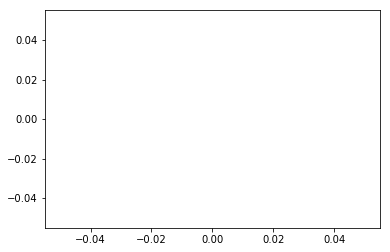

In [64]:
plt.show()

In [67]:
x=sub_df['monthlyTotalRain']

In [68]:
y=sub_df['meanMaxTemp']

In [82]:
plt.plot(x,'o')

In [85]:
plt.plot(y,'ro')

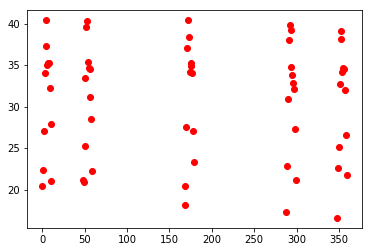

In [86]:
plt.show()

In [89]:
plt.plot(x,y,'scatter')

ValueError: Unrecognized character a in format string